# Concepts

#### We have Books, Rating and User csv file, from where we will pick up book and rating file.

#### Since the book have book name and ratings have user id, book id and rating, we'll make a new data frame that will make n users as its column and book name will be in row of the data frame. Value of the each row will be rate done by a particular user.

#### Here we won't be considering all of the books and users. We'll consider only those users who have given rating to more than 200 books and we'll choose those books whose total rating is greater than 50.

####

####


In [3]:
# importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# importing the df
books = pd.read_csv("../csv/Books.csv")
ratings = pd.read_csv("../csv/Ratings.csv")
users = pd.read_csv("../csv/Users.csv")

/tmp/ipykernel_5453/4069772381.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("../csv/Books.csv")


### **Merging rating dataframe with books**


In [5]:
# Merging the book with rating df
rating_with_name = ratings.merge(books, on="ISBN")

In [6]:
print(
    f"rating shape:{ratings.shape}\nbooks shape:{books.shape}\nusers shape: {users.shape}\nrating with name shape:{rating_with_name.shape}"
)

rating shape:(1149780, 3)
books shape:(271360, 8)
users shape: (278858, 3)
rating with name shape:(1031136, 10)


In [7]:
rating_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


### This histogram shows the distribution of all book ratings in your dataset, giving an overview of how ratings are spread across different values.


/home/aayush-krk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


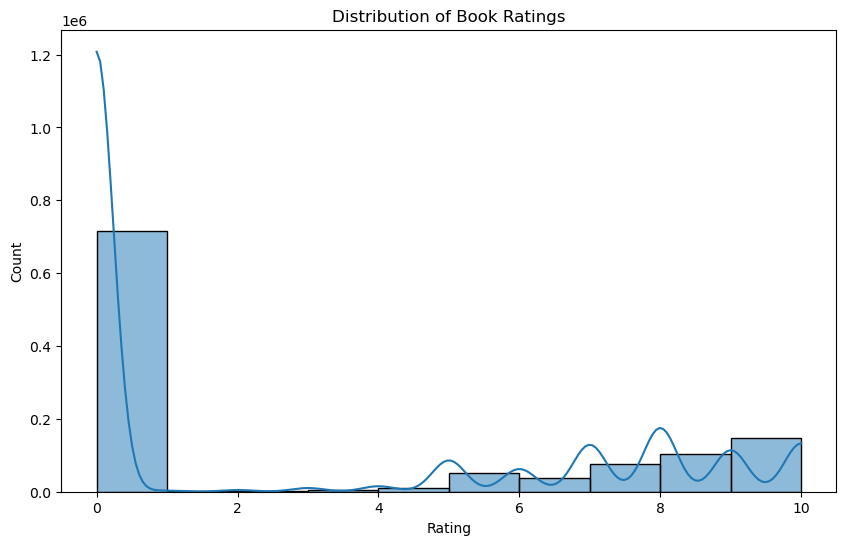

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings["Book-Rating"], bins=10, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### We're filtering out such that only those users who have done minimum of 200 votings will be kept in df.


In [9]:
# groupby function in pandas is used to split the data into groups based on some criteria
"""This groups the DataFrame by the "User-ID" column. Each unique value in "User-ID" becomes a group, and all rows with the same "User-ID" are placed into that group. After grouping by "User-ID", the count() function is applied. This function counts the number of non-NA/null entries in each column for each group. Finally the ['Book-Rating'] helps to retreive only the Book-Rating column"""
voted_users = rating_with_name.groupby("User-ID").count()["Book-Rating"]

# doing boolean indexing: here voted_user return the record of all the user who have voted for 1 or more time.
# voted_user>200 returns boolean of either True(if his/her vote count is >200) or false(if his/her vote count is <200)
# finally we did boolean indexing in the voted_user var which return those users record who have voted for more than 200 time.
experience_voted_user = voted_users[voted_users > 200]

experience_voted_user_index = experience_voted_user.index
experience_voted_user
# It shows only 811 unique users have voted for more than 200 times

User-ID
254        300
2276       456
2766       269
2977       227
3363       890
          ... 
274308    1293
275970    1325
277427     490
277639     265
278418    3996
Name: Book-Rating, Length: 811, dtype: int64

### Count of Votes per User

- To visualize how many votes each user has cast before filtering:


/home/aayush-krk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


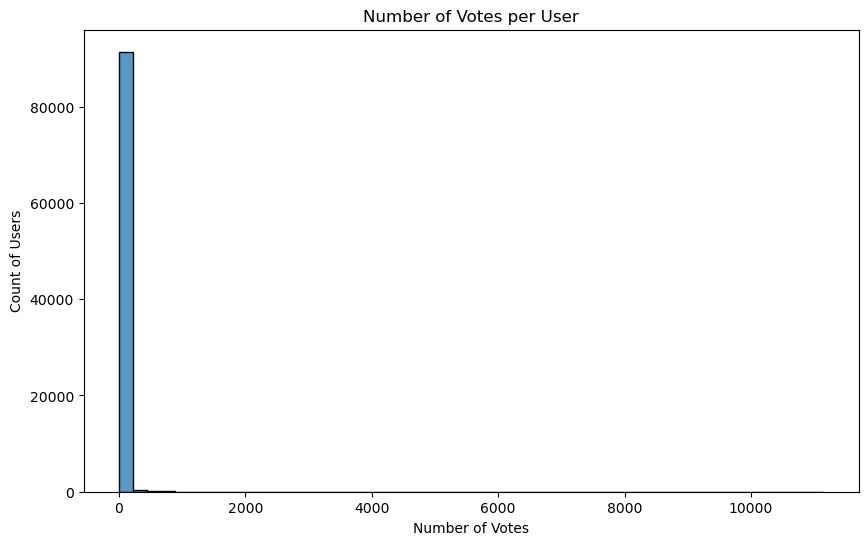

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(voted_users, bins=50, kde=False)
plt.title("Number of Votes per User")
plt.xlabel("Number of Votes")
plt.ylabel("Count of Users")
plt.show()

In [11]:
experience_voted_user_index

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

- The length of above result shows out of 278858 users in our data set only 92106 have rated books
- Again from these result of user voted, we will only choose those use who have voted for more than 200 times


### Now that we've got the User-ID of those user who have voted for more than 200 times, we will filter out from rating_with_name dataframe to grab those books which have obtain voting from more than 50 readers


In [12]:
filtered_rating = rating_with_name[
    rating_with_name["User-ID"].isin(experience_voted_user_index)
]

In [13]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


### From the obtained DF, we will filter out those books whose rating is less than 50 and keep only those whose rating is greater than 50


In [14]:
books_with_rating = filtered_rating.groupby("Book-Title").count()["Book-Rating"]
books_with_rating

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                1
                                                                                                             ..
Ã?Â?ber das Fernsehen.                                                                                        2
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           3
Ã?Â?lpiraten.                                                                                

In [15]:
# Performing boolean indexing which gives us the book with rating greater than 50
books_with_higher_rating = books_with_rating[books_with_rating >= 50]
index_books_with_higher_rating = books_with_higher_rating.index
books_with_higher_rating

Book-Title
1984                                                                  70
1st to Die: A Novel                                                  160
2nd Chance                                                           122
4 Blondes                                                             70
A Bend in the Road                                                   114
                                                                    ... 
Year of Wonders                                                       57
You Belong To Me                                                      55
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values     62
Zoya                                                                  59
\O\" Is for Outlaw"                                                  101
Name: Book-Rating, Length: 706, dtype: int64

In [16]:
index_books_with_higher_rating

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

### This is the final filtered dataframe which contains those user whose voting_count>200 and those books whos rating_count>50


In [17]:
final_filtered_rating = filtered_rating[
    filtered_rating["Book-Title"].isin(index_books_with_higher_rating)
]
final_filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [18]:
final_filtered_rating1 = final_filtered_rating
# checking whether there is duplcates or not
final_filtered_rating1.drop_duplicates().shape

(58586, 10)

## As we have got the final filtered dataframe, we gonna use pivot table to creata new dataframe where in column there will be user id and in row there will be book isbn


In [19]:
pt = final_filtered_rating.pivot_table(
    index="Book-Title", columns="User-ID", values="Book-Rating"
)

In [37]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Heatmap of Ratings Matrix

- After filtering to include only users with more than 200 votes and books with more than 50 ratings:


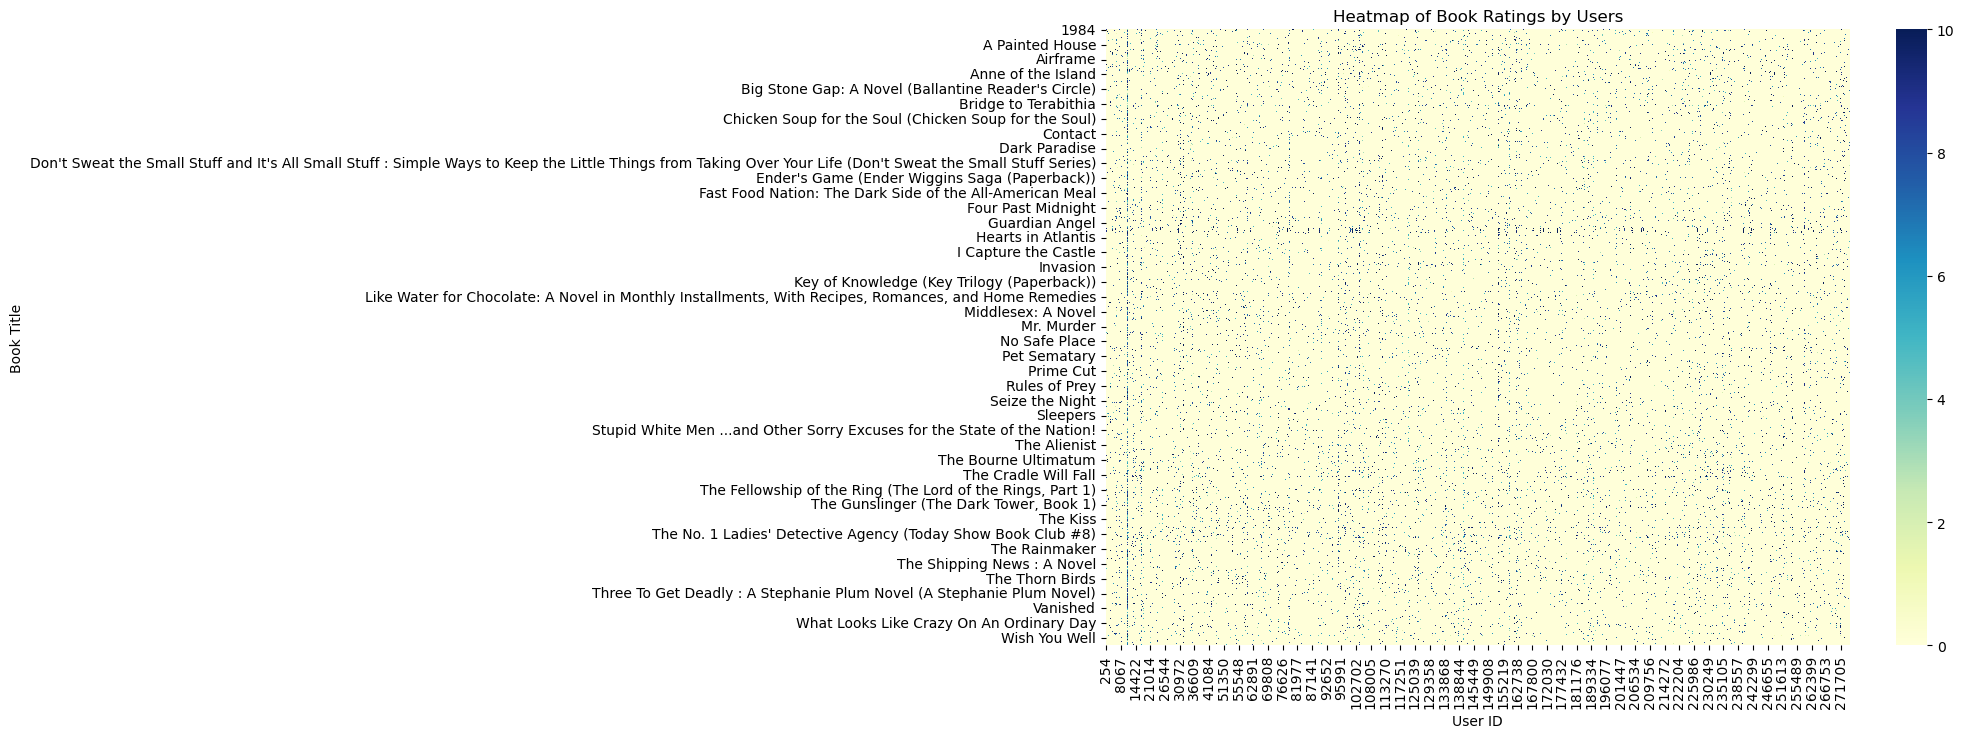

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(pt, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Book Ratings by Users")
plt.xlabel("User ID")
plt.ylabel("Book Title")
plt.show()

In [40]:
# replacing the NaN value with 0
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Working on the Training Part of the Model


### -> After preprocessing and cleaning the dataframe, we got the dataframe of 706 rows(i.e. books) and 810 rows(i.e. users vote).

### -> Now, we can consider each books as a point in 810 dimensional space.

### -> After that we plot those points in the space and each book became vector in the space.

### -> Now, we calculate the euclidean distance between every vector with each other.

### -> After that based on the distance, we find the similar books.

### -> .


In [41]:
# importing the cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
cosine_sim_result = cosine_similarity(pt)

In [43]:
""" Here we've calculated the Euclidean distance of 706 books with other 706 books """

print(cosine_sim_result.shape)
cosine_sim_result

(706, 706)


array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [44]:
# Each vector consists of 706 different Euclidean distance
cosine_sim_result[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

### Here we can see the visualization of euclidean distance of books named 1984 with other 705 books

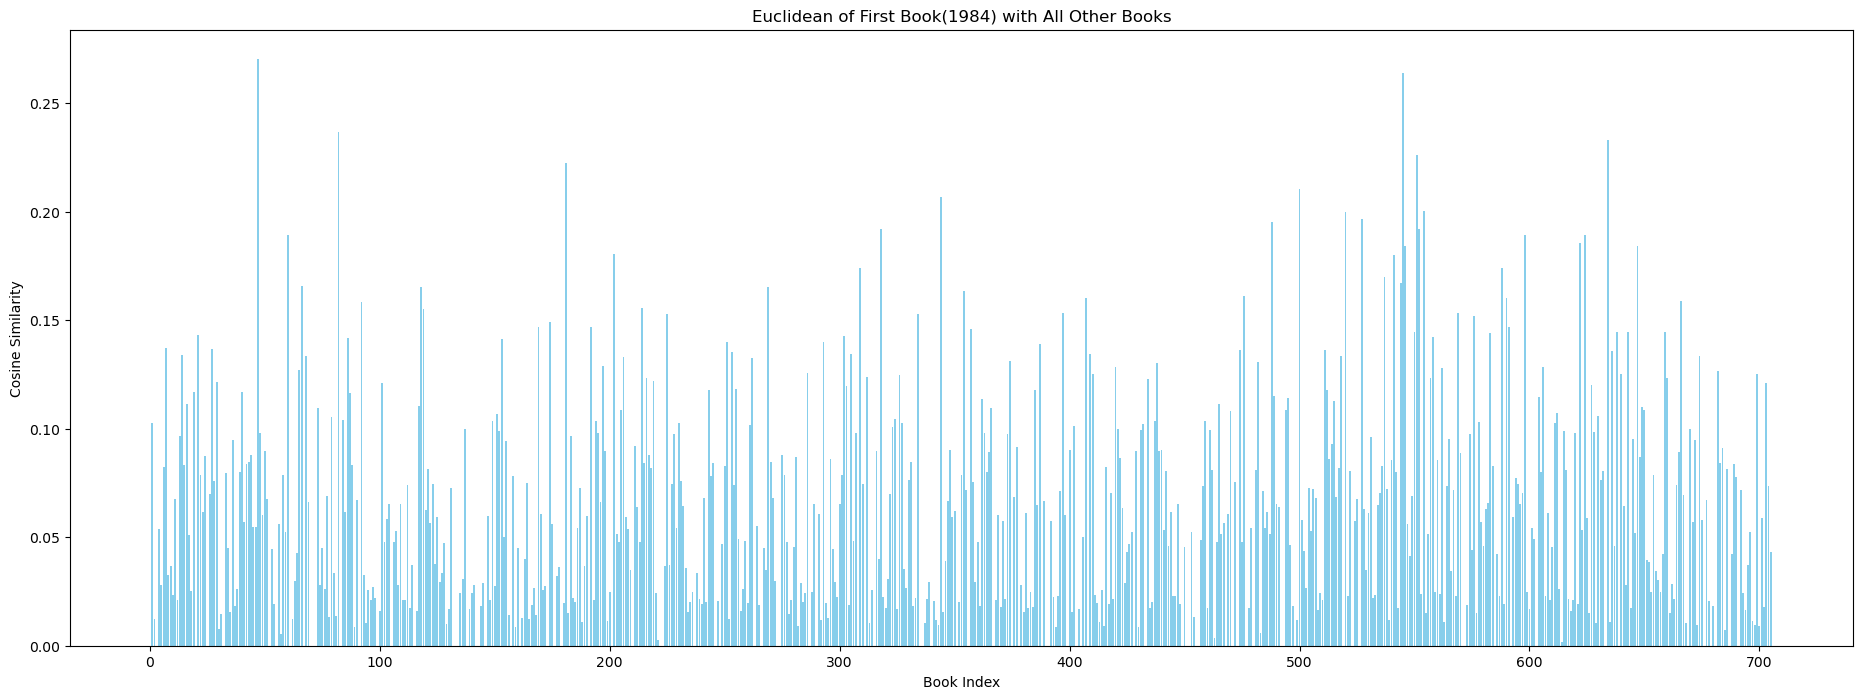

In [45]:
# Get the cosine similarity scores for the first book with all other books
cosine_sim_scores_firstbook = cosine_sim_result[0]

# Create a bar plot
plt.figure(figsize=(23, 8))
plt.bar(
    range(1, len(cosine_sim_scores_firstbook)),
    cosine_sim_scores_firstbook[1:],
    color="skyblue",
)
plt.xlabel("Book Index")
plt.ylabel("Cosine Similarity")
plt.title("Euclidean of First Book(1984) with All Other Books")
plt.show()

In [54]:
""" Creating a method that takes the books name and returns us books with nearest distance in context of the euclidean distance """
def recommend_book(book_name):
    # finding the index of the book
    book_index = np.where(pt.index == book_name)[0][0]
    # Now that we've got the book_index of searched book, we visit that index of our cosine_sim_result matrix
    distances = cosine_sim_result[book_index]
    similar_books = sorted(
        list(enumerate(distances)), key=lambda x: x[1], reverse=True
    )[1:10]

    for i in similar_books:
        """ print(f"{i[0]}: {i[1]}") """
        print(pt.index[i[0]])

In [55]:
recommend_book("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes
Sanctuary
All I Really Need to Know
Midnight Bayou
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)


In [56]:
""" enumerate gives us the distance along with the book index and we convert it into list """
recommend_book('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Fahrenheit 451
The Catcher in the Rye
Naked
The Hundred Secret Senses
